In [10]:
import pandas as pd
import numpy as np
import itertools
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import tqdm
import numpy.random as nr
from statsmodels.stats.diagnostic import kstest_normal

In [ ]:
# protasov.vp@phystech.edu

In [22]:
#Функции для генерации выборок из определенного распределения определенного размера
def norm(sized):
    return st.distributions.norm(0, 1).rvs(size=sized)
def laplace(sized):
    return st.distributions.laplace.rvs(loc = 0, scale = 1, size=sized)
def t_student(sized):
    return st.distributions.t.rvs(df = 2, size=sized)
def truncnorm(sized):
    return st.distributions.truncnorm.rvs(a = -2, b = 2, size=sized)

Далее займёмся проверкой мощностей выборок. 

Согласно определению, что мощность - вероятность правильно отвергнуть нулевую гипотезу. Для этого воспользуемся соответствующими тестами для выборок.

### 1) kstest_normal - Lilliefors test

In [75]:
new_norm1 = []
new_laplace1 = []
new_student1 = []
new_trunc1 = []

In [76]:
for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = kstest_normal(norm(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_norm1.append(rejected / n)


for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = kstest_normal(laplace(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_laplace1.append(rejected / n)
    
    
for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = kstest_normal(t_student(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_student1.append(rejected / n)

for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = kstest_normal(truncnorm(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_trunc1.append(rejected / n)


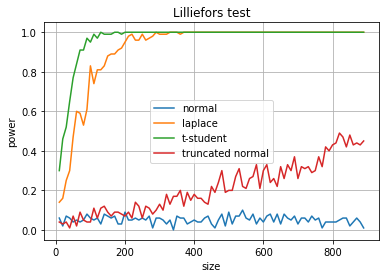

In [77]:
plt.plot(range(10,900,10), new_norm1, label = 'normal')
plt.plot(range(10,900,10), new_laplace1, label = 'laplace')
plt.plot(range(10,900,10), new_student1, label = 't-student')
plt.plot(range(10,900,10), new_trunc1, label = 'truncated normal')


plt.title('Lilliefors test')
plt.grid()
plt.xlabel('size')
plt.ylabel('power')
plt.legend()
plt.show()

In [79]:
print(np.mean(new_norm1), np.mean(new_laplace1), np.mean(new_student1), np.mean(new_trunc1))

0.05146067415730337 0.9197752808988764 0.9685393258426966 0.21179775280898874


### Вывод по Лилиефорса тесту: 
Мощности для нормального и усечённого нормального и усечённого нормального распределения малы, что не круто, проверим остальные критерии для наглядности

### 2) st.jarque_bera - Jarque-Bera test

In [80]:
new_norm2 = []
new_laplace2 = []
new_student2 = []
new_trunc2 = []

In [81]:
for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.jarque_bera(norm(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_norm2.append(rejected / n)


for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.jarque_bera(laplace(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_laplace2.append(rejected / n)
    
    
for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.jarque_bera(t_student(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_student2.append(rejected / n)

for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.jarque_bera(truncnorm(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_trunc2.append(rejected / n)


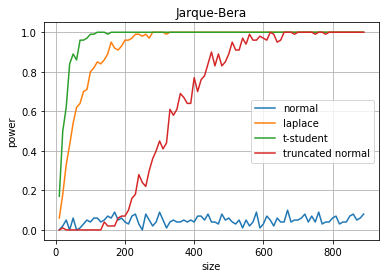

In [82]:
plt.plot(range(10,900,10), new_norm2, label = 'normal')
plt.plot(range(10,900,10), new_laplace2, label = 'laplace')
plt.plot(range(10,900,10), new_student2, label = 't-student')
plt.plot(range(10,900,10), new_trunc2, label = 'truncated normal')


plt.title('Jarque-Bera')
plt.grid()
plt.xlabel('size')
plt.ylabel('power')
plt.legend()
plt.show()

In [83]:
print(np.mean(new_norm2), np.mean(new_laplace2), np.mean(new_student2), np.mean(new_trunc2))

0.04797752808988764 0.9301123595505618 0.9746067415730336 0.6258426966292135


### Вывод по Харке-Бера тесту:
Мощность для нормального распределения осталась мала, а для усечённого нормального стала расти в зависимости от размера выборки.

### 3) st.shapiro - Shapiro test

In [84]:
new_norm3 = []
new_laplace3 = []
new_student3 = []
new_trunc3 = []

In [85]:
for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.shapiro(norm(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_norm3.append(rejected / n)


for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.shapiro(laplace(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_laplace3.append(rejected / n)
    
    
for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.shapiro(t_student(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_student3.append(rejected / n)

for i in range(10,900,10):
    rejected = 0
    count = 0
    while count < n:
        p_value = st.shapiro(truncnorm(i))
        if p_value[1] < 0.05:
            rejected += 1
        count += 1
    
    new_trunc3.append(rejected / n)


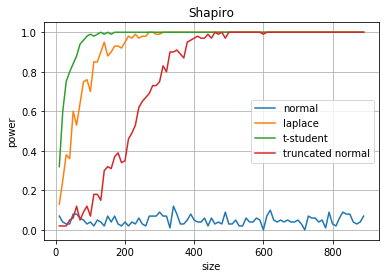

In [86]:
plt.plot(range(10,900,10), new_norm3, label = 'normal')
plt.plot(range(10,900,10), new_laplace3, label = 'laplace')
plt.plot(range(10,900,10), new_student3, label = 't-student')
plt.plot(range(10,900,10), new_trunc3, label = 'truncated normal')


plt.title('Shapiro')
plt.grid()
plt.xlabel('size')
plt.ylabel('power')
plt.legend()
plt.show()

In [87]:
print(np.mean(new_norm3), np.mean(new_laplace3), np.mean(new_student3), np.mean(new_trunc3))



0.04820224719101124 0.9326966292134832 0.9776404494382022 0.76


### Вывод по Шапиро тесту:
Мощность для нормального распределения также осталась мала на фоне остальных, а для усечённого нормального явно выше чем, в остальных критериях

## Общий вывод про мощности критериев
Если взглянуть на средние значения мощностей критериев для разных распределений, то можно заметить заметный равномерный прирост для всех выборок, кроме нормальной.

Поэтому можно в целом сделать вывод, что мощность критерия Шапиро самая высокая, а самая низкая у Лиллиефорса

## Проверим консервативность критериев

#### Критерий консервативен — истинная вероятность ошибки первого рода ограничена уровнем значимости сверху.

Построим графики сравнения мощностей для разных критериев

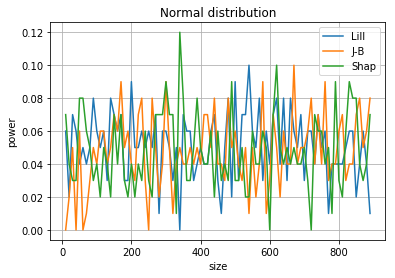

In [98]:
plt.plot(range(10,900,10), new_norm1, label = 'Lill')
plt.plot(range(10,900,10), new_norm2, label = 'J-B')
plt.plot(range(10,900,10), new_norm3, label = 'Shap')


plt.title('Normal distribution')
plt.grid()
plt.xlabel('size')
plt.ylabel('power')
plt.legend()
plt.show()

In [99]:
np.mean(new_norm1 + new_norm2 + new_norm3) < 0.05

True

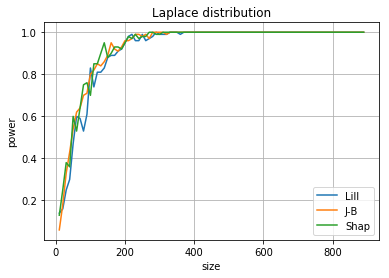

In [92]:
plt.plot(range(10,900,10), new_laplace1, label = 'Lill')
plt.plot(range(10,900,10), new_laplace2, label = 'J-B')
plt.plot(range(10,900,10), new_laplace3, label = 'Shap')


plt.title('Laplace distribution')
plt.grid()
plt.xlabel('size')
plt.ylabel('power')
plt.legend()
plt.show()

In [95]:
np.mean(new_laplace1 + new_laplace2 + new_laplace3) < 0.05

False

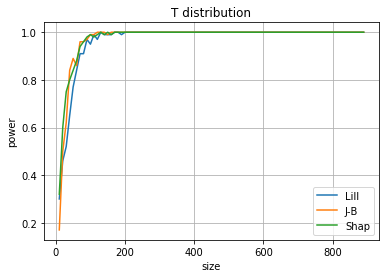

In [96]:
plt.plot(range(10,900,10), new_student1, label = 'Lill')
plt.plot(range(10,900,10), new_student2, label = 'J-B')
plt.plot(range(10,900,10), new_student3, label = 'Shap')


plt.title('T distribution')
plt.grid()
plt.xlabel('size')
plt.ylabel('power')
plt.legend()
plt.show()

In [97]:
np.mean(new_student1 + new_student2 + new_student3) < 0.05

False

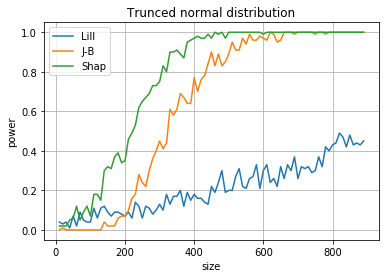

In [100]:
plt.plot(range(10,900,10), new_trunc1, label = 'Lill')
plt.plot(range(10,900,10), new_trunc2, label = 'J-B')
plt.plot(range(10,900,10), new_trunc3, label = 'Shap')


plt.title('Trunced normal distribution')
plt.grid()
plt.xlabel('size')
plt.ylabel('power')
plt.legend()
plt.show()

In [104]:
np.mean(new_trunc1 + new_trunc2 + new_trunc3) < 0.05

False

# Вывод: 
## Согласно итоговым графикам мощности, вывод, сделанный выше на глаз, подтвердился. 
## Насчёт консервативности можно сказать, что для нормального распределения, согласно графику и среднему значению, все критерии консервативны.
## Для лапласса и стьюдента худший результат у критерия Лилиефорса, но стоит заметить, что выборка пала так, что на глаз критерии хороши.
## Для усечённого нормального видна явная разница между критериями. Для данного распределения только Лилиефорса является консервативным.

### => Очевидно, что критерий Шапиро использовать лучше, ибо он даёт самую высокую мощность для всех расмотренных выборок.